In [8]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
import catboost as cb


from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.discriminant_analysis import StandardScaler
import warnings
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')



In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


models_classification = {
    "linear":LogisticRegression(),
    "catboost":cb.CatBoostClassifier(verbose=0),
    # "lightgbm":lgb.LGBMClassifier(verbose=0,max_depth=5,num_leaves: 31,),
    "random_forest":RandomForestClassifier(),
    "mlp":MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    
}

models_regression = {
    "linear":LinearRegression(),
    "catboost":cb.CatBoostRegressor(verbose=0),
    # "lightgbm":lgb.LGBMClassifier(verbose=0,max_depth=5,num_leaves: 31,),
    "random_forest":RandomForestRegressor(),
    
}

In [10]:
#tools

from sklearn.metrics import make_scorer, mean_squared_error


def train_models(models:dict,X,y):
    models_score={}
    for key_value in models.keys():
        print(f"Current Model in Training: {key_value}")
        scores = cross_val_score(models[key_value],X,y,cv=5)
        print(f"Scores across various {scores}")
        print(f"mean: {np.mean(scores)}")
        models_score[key_value] = {"mean":np.mean(scores),"scores":scores}

    key_with_highest_mean = max(models_score, key=lambda k: models_score[k]['mean'])
    print(f"model with the best perfomance: {key_with_highest_mean}")
    print(f"with the accuracy of {models_score[key_with_highest_mean]}")

    return models_score,models


def train_models_regression(models:dict,X,y,scorer = make_scorer(mean_squared_error, greater_is_better=False)):
    models_score={}
    for key_value in models.keys():
        print(f"Current Model in Training: {key_value}")
        scores = cross_val_score(models[key_value],X,y,cv=5,scoring=scorer)
        print(f"Scores across various {scores}")
        print(f"mean: {np.mean(scores)}")
        models_score[key_value] = {"mean":np.mean(scores),"scores":scores}

    key_with_highest_mean = max(models_score, key=lambda k: models_score[k]['mean'])
    print(f"model with the best perfomance: {key_with_highest_mean}")
    print(f"with the accuracy of {models_score[key_with_highest_mean]}")

    return models_score,models

In [3]:
import pandas as pd
data  = pd.read_csv("Data/all_crops_labeled_3.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATIONNAME             349 non-null    object 
 1   LONGITUDE               349 non-null    float64
 2   LATITUDE                349 non-null    float64
 3   ELEVATION_METER         342 non-null    float64
 4   COUNTRY                 349 non-null    object 
 5   CROP                    349 non-null    object 
 6   YA                      348 non-null    float64
 7   YW                      349 non-null    float64
 8   YW-YA                   349 non-null    float64
 9   YP                      349 non-null    float64
 10  YP-YA                   349 non-null    float64
 11  WPP                     337 non-null    float64
 12  WPA                     336 non-null    float64
 13  CROPPING_INTENSITY      349 non-null    float64
 14  YW_CV_TEMPORAL          281 non-null    fl

In [5]:
data.describe()


,LONGITUDE,LATITUDE,ELEVATION_METER,YA,YW,YW-YA,YP,YP-YA,WPP,WPA,...,cation_exchange,zinc_extractable,sulphur_extractable,aluminium_extractable,carbon_organic,carbon_total,iron_extractable,sand_content,silt_content,stone_content
count,349.000000,349.000000,342.000000,348.000000,349.000000,349.000000,349.000000,349.000000,337.000000,336.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,20.968888,4.560747,998.853801,2.347027,8.115290,5.779549,11.137505,8.797203,16.958498,4.739692,...,11.933811,1.692264,6.718052,135.767622,10.053295,17.759885,62.248424,52.389685,19.773639,2.795129
std,17.481337,9.005561,706.672838,5.941404,10.177188,4.919987,14.547991,8.972436,11.110723,6.469787,...,6.239681,1.055921,5.369833,79.845004,6.038918,10.051868,23.873824,12.147442,4.371774,1.704997
min,-16.290000,-29.983000,0.000000,0.171145,0.891249,0.000000,1.939094,0.780299,3.558881,0.564419,...,1.700000,0.300000,1.000000,11.200000,1.500000,0.300000,1.500000,26.000000,6.000000,0.200000
25%,4.750000,-0.114000,323.000000,0.971950,4.191327,2.788382,5.908591,4.593031,11.209132,2.605445,...,8.000000,1.000000,4.500000,80.500000,5.000000,10.000000,48.400000,42.000000,17.000000,1.500000
50%,31.515613,8.183000,1086.000000,1.488700,6.433190,4.955043,8.943709,7.150052,15.524099,3.813899,...,10.000000,1.500000,5.700000,120.500000,9.000000,17.200000,65.700000,54.000000,19.000000,2.300000
75%,35.530000,11.310000,1530.000000,2.180833,9.026175,7.103447,13.022500,10.850700,20.242211,5.062946,...,13.900000,2.300000,7.200000,180.300000,12.500000,23.500000,72.700000,61.000000,22.000000,3.500000
max,43.500000,15.330000,3525.000000,59.662274,102.014087,42.351814,127.265675,80.027579,100.017184,63.056293,...,35.600000,7.200000,32.100000,491.700000,29.000000,89.000000,163.000000,78.000000,30.000000,7.200000


In [6]:
data.columns


Index(['STATIONNAME', 'LONGITUDE', 'LATITUDE', 'ELEVATION_METER', 'COUNTRY',
       'CROP', 'YA', 'YW', 'YW-YA', 'YP', 'YP-YA', 'WPP', 'WPA',
       'CROPPING_INTENSITY', 'YW_CV_TEMPORAL', 'YP_CV_TEMPORAL',
       'YA_CV_TEMPORAL', 'CLIMATEZONE', 'AREA_IN_CLIMATEZONE_HA', 'nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange',
       'zinc_extractable', 'texture_class', 'sulphur_extractable',
       'aluminium_extractable', 'carbon_organic', 'carbon_total', 'fcc',
       'iron_extractable', 'sand_content', 'silt_content', 'slope_angle',
       'stone_content'],
      dtype='object')

#### Performance with only Data scaling

In [12]:


y = data["CROP"]
X= data[[ 'nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange',
       'zinc_extractable', 'sulphur_extractable',
       'aluminium_extractable', 'carbon_organic', 'carbon_total',
       'iron_extractable', 'sand_content', 'silt_content',
       
       'stone_content']]
# print(np.mean(X["ELEVATION_METER"].tolist()))
# X["ELEVATION_METER"] = X[["ELEVATION_METER"]].fillna(np.mean(X[X["ELEVATION_METER"]>0]["ELEVATION_METER"].to_list()),axis=1)
scaler = StandardScaler()
array_scaled = scaler.fit_transform(X)
X = pd.DataFrame(array_scaled,columns=X.columns)

scores,models_classification = train_models(models=models_classification,X=X,y=y)

Current Model in Training: linear
Scores across various [0.38571429 0.3        0.17142857 0.28571429 0.28985507]
mean: 0.2865424430641822
Current Model in Training: catboost
Scores across various [0.28571429 0.27142857 0.1        0.18571429 0.30434783]
mean: 0.2294409937888199
Current Model in Training: random_forest
Scores across various [0.32857143 0.27142857 0.1        0.18571429 0.31884058]
mean: 0.24091097308488613
Current Model in Training: mlp
Scores across various [0.32857143 0.22857143 0.18571429 0.2        0.30434783]
mean: 0.24944099378881987
model with the best perfomance: linear
with the accuracy of {'mean': 0.2865424430641822, 'scores': array([0.38571429, 0.3       , 0.17142857, 0.28571429, 0.28985507])}


In [27]:
from sklearn.metrics import accuracy_score
models_classification["catboost"].fit(X,y)
predictions = models_classification["catboost"].predict(X)
accuracy_score(y,predictions)

0.5243553008595988

In [9]:
import joblib as jb

jb.dump(scaler,"scalerv3.pkl")
jb.dump(models_classification["catboost"],"classiferv3.pkl")

['classiferv3.pkl']

In [11]:
classifier = jb.load("classiferv3.pkl")
predictions =classifier.predict_proba(X)
predictions

array([[3.39275600e-01, 3.20364629e-01, 2.51257052e-03, 3.07527298e-02,
        5.37499063e-04, 3.06556972e-01],
       [4.32932392e-01, 1.03644821e-02, 2.10953782e-03, 2.23892926e-02,
        2.97912629e-04, 5.31906383e-01],
       [2.51437467e-01, 2.47387005e-01, 7.70445427e-03, 2.54534391e-01,
        1.07669862e-03, 2.37859985e-01],
       ...,
       [3.38127867e-01, 3.02143513e-01, 3.14992852e-01, 4.30219464e-02,
        5.89599963e-04, 1.12422146e-03],
       [4.71988492e-01, 4.44638688e-01, 5.23201530e-02, 2.62240584e-02,
        4.06899026e-04, 4.42170963e-03],
       [4.39774212e-01, 4.98609571e-01, 3.76198288e-02, 2.20358507e-02,
        9.47030106e-04, 1.01350750e-03]])

In [ ]:
##

### With anomaly values removed

In [ ]:

X= data[['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]

data_with_anomaly= data.copy()

# Removing Anomaly values using IsolationTree 
IF = IsolationForest(n_estimators=100, contamination=0.03)
predictions = IF.fit_predict(X)
print(predictions)
data_with_anomaly["anomaly"] = predictions

X = data_with_anomaly[data_with_anomaly.anomaly == 1][['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]
y = data_with_anomaly[data_with_anomaly.anomaly == 1]["CROP"]

#scaling the data
scaler = StandardScaler()
array_scaled = scaler.fit_transform(X)
X = pd.DataFrame(array_scaled,columns=X.columns)

#training
scores,models_classification = train_models(models=models_classification,X=X,y=y)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

### With anomaly values removed for each class

In [ ]:

X= data[['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]

data_with_anomaly= data.copy()

classes = data["CROP"].unique()
predictions_all = []
# Removing Anomaly values using IsolationTree 
for crop_class in classes:
    class_data = data_with_anomaly[data_with_anomaly['CROP']==crop_class]
    X = class_data[['nitrogen','phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]
    IF = IsolationForest(n_estimators=100, contamination=0.03)
    predictions = IF.fit_predict(X)
    print(predictions)
    predictions_all.extend(predictions)

data_with_anomaly["anomaly"] = predictions_all

X = data_with_anomaly[data_with_anomaly.anomaly == 1][['nitrogen',
    'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]
y = data_with_anomaly[data_with_anomaly.anomaly == 1]["CROP"]

#scaling the data
scaler = StandardScaler()
array_scaled = scaler.fit_transform(X)
X = pd.DataFrame(array_scaled,columns=X.columns)

#training
scores,models_classification = train_models(models=models_classification,X=X,y=y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1]
[ 1  1 -1  1  1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 

### Observing correlation between nutrients

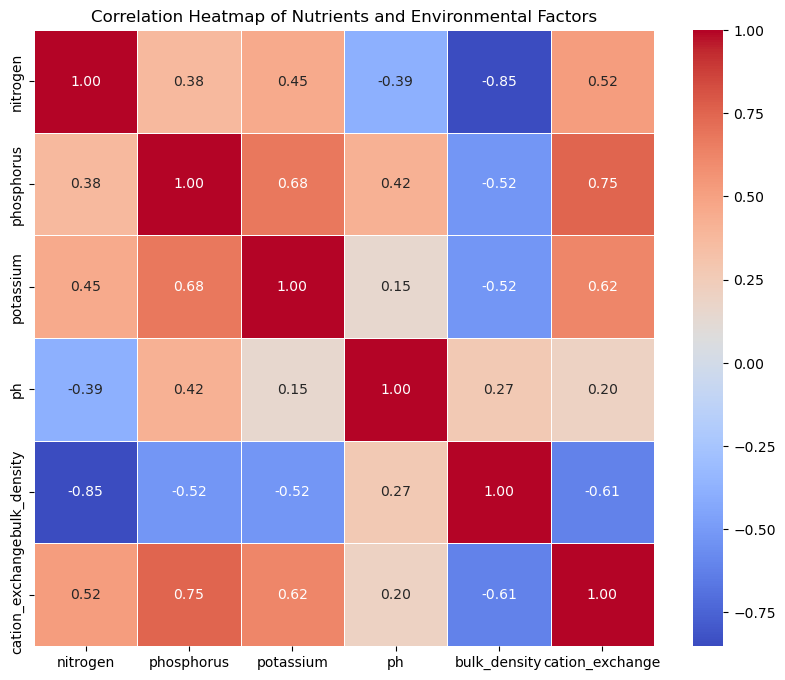

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


selected_columns = ['nitrogen','phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']
correlation_matrix = data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nutrients and Environmental Factors')
plt.savefig(f"output/plots/HeatMap.png")


plt.show()

### Performing regression on the YA (yield average)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

numerical_columns =['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']

categorical_columns = ["CROP"]
X= data[['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange',"CROP"]]

y = data["YW"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(X)

# Get feature names after preprocessing
numerical_features = numerical_columns
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
feature_names = numerical_features + list(categorical_features)

# Create a DataFrame with the processed features
X_processed = pd.DataFrame(X, columns=feature_names, index=data.index)

scores_output, models_output = train_models_regression(models_regression,X=X_processed,y=y,scorer=make_scorer(mean_absolute_error,greater_is_better=False))

Current Model in Training: linear
Scores across various [-7.12142415 -1.47044631 -2.55701022 -3.24345896 -2.47015421]
mean: -3.372498772305492
Current Model in Training: catboost
Scores across various [-6.70813528 -1.3102565  -2.89455106 -2.81800969 -1.74148681]
mean: -3.0944878673291902
Current Model in Training: random_forest
Scores across various [-7.03973819 -1.49803838 -3.7477994  -3.03195565 -2.0592181 ]
mean: -3.47534994285355
model with the best perfomance: random_forest
with the accuracy of {'mean': -3.47534994285355, 'scores': array([-7.03973819, -1.49803838, -3.7477994 , -3.03195565, -2.0592181 ])}


In [16]:
models_regression["catboost"].fit(X_processed,y)
predictions  = models_regression["catboost"].predict(X_processed[0])
mean_absolute_error(y,predictions)

0.47589889899565196

In [1]:
predictions  = models_regression["catboost"].predict(X_processed[0])

NameError: name 'models_regression' is not defined

In [17]:
import joblib as jb

jb.dump(preprocessor,"preprocessorv3.pkl")
jb.dump(models_regression["catboost"],"regressorv3.pkl")

['regressorv3.pkl']

In [ ]:
import joblib as job

### Neural Network

In [ ]:
import tensorflow as tf

2024-06-24 09:43:28.795658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 09:43:28.795704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 09:43:28.798758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 09:43:29.092549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 09:43:31.939453: W tensorflow/compiler/

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the Iris dataset
y = data["CROP"]
X= data[['nitrogen',
       'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]

# One-hot encode the target labels
encoder = OneHotEncoder()
print(np.array(y.tolist()))
y = encoder.fit_transform(np.array(y.tolist()))
print(y)
# print("sdaghifsdjifhjksdahfkjsadhkjfkjasdfkjashkjf")
# # Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_train)
# # Calculate mean and variance of the training data for normalization
# normalizer = tf.keras.layers.Normalization()
# normalizer.adapt(X_train.to_numpy())

# # Define the neural network model with normalization layer
# model = tf.keras.Sequential([
#     normalizer,  # Normalization layer
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train.to_numpy(), y_train, epochs=100, batch_size=16, verbose=1)

# # Evaluate the model on the training data
# train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")



['wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'sugarcane' 'sugarcane' 'sugarcane' 'sugarcane' 'sugarcane'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 '

ValueError: Expected 2D array, got 1D array instead:
array=['wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat' 'wheat'
 'wheat' 'sugarcane' 'sugarcane' 'sugarcane' 'sugarcane' 'sugarcane'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum'
 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'sorghum' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice' 'rice'
 'rice' 'rice' 'rice' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize' 'maize'
 'maize' 'maize' 'maize' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet' 'millet'
 'millet' 'millet' 'millet'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'data' is your pandas DataFrame
y = data["CROP"]
X = data[['nitrogen', 'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']]

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert to numpy arrays
X_array = X.values
y_array = y_encoded

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Create a Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

# Define the model
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)
predicted_crop_names = le.inverse_transform(predicted_classes)

# Function to predict crop for new data
def predict_crop(nitrogen, phosphorus, potassium, ph, bulk_density, cation_exchange):
    input_data = np.array([[nitrogen, phosphorus, potassium, ph, bulk_density, cation_exchange]])
    prediction = model.predict(input_data)
    predicted_class = tf.argmax(prediction, axis=1)
    return le.inverse_transform(predicted_class)[0]

# Example usage
example_crop = predict_crop(50, 30, 20, 6.5, 1.3, 10)
print(f"Predicted crop: {example_crop}")

Epoch 1/2000
7/7 [==============================] - 4s 84ms/step - loss: 1.7513 - accuracy: 0.3004 - val_loss: 1.6631 - val_accuracy: 0.3036
Epoch 2/2000
7/7 [==============================] - 0s 20ms/step - loss: 1.6534 - accuracy: 0.3274 - val_loss: 1.5862 - val_accuracy: 0.3036
Epoch 3/2000
7/7 [==============================] - 0s 20ms/step - loss: 1.6197 - accuracy: 0.3139 - val_loss: 1.5387 - val_accuracy: 0.3929
Epoch 4/2000
7/7 [==============================] - 0s 20ms/step - loss: 1.5545 - accuracy: 0.3677 - val_loss: 1.5321 - val_accuracy: 0.3214
Epoch 5/2000
7/7 [==============================] - 0s 21ms/step - loss: 1.5313 - accuracy: 0.3363 - val_loss: 1.4741 - val_accuracy: 0.4107
Epoch 6/2000
7/7 [==============================] - 0s 17ms/step - loss: 1.4885 - accuracy: 0.3722 - val_loss: 1.4423 - val_accuracy: 0.4107
Epoch 7/2000
7/7 [==============================] - 0s 20ms/step - loss: 1.4454 - accuracy: 0.3632 - val_loss: 1.4320 - val_accuracy: 0.3929
Epoch 8/2000


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your pandas DataFrame
X = data[['nitrogen', 'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange', 'CROP']]
y = data['YW']

# Encode the categorical 'CROP' feature
le = LabelEncoder()
X['CROP'] = le.fit_transform(X['CROP'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the numerical and categorical features
numerical_features = ['nitrogen', 'phosphorus', 'potassium', 'ph', 'bulk_density', 'cation_exchange']
categorical_features = ['CROP']

# Create the model
def create_model(num_numerical_features, num_categories):
    # Numerical features input
    numerical_inputs = tf.keras.Input(shape=(num_numerical_features,))
    numerical_features = tf.keras.layers.Normalization()(numerical_inputs)
    
    # Categorical features input
    categorical_inputs = tf.keras.Input(shape=(1,), dtype=tf.int64)
    categorical_features = tf.keras.layers.Embedding(num_categories, 16)(categorical_inputs)
    categorical_features = tf.keras.layers.Flatten()(categorical_features)
    
    # Concatenate all features
    features = tf.keras.layers.Concatenate()([numerical_features, categorical_features])
    
    # Dense layers
    x = tf.keras.layers.Dense(64, activation='relu')(features)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    
    # Output layer
    output = tf.keras.layers.Dense(1)(x)
    
    # Create the model
    model = tf.keras.Model(inputs=[numerical_inputs, categorical_inputs], outputs=output)
    
    return model

# Create and compile the model
num_numerical_features = len(numerical_features)
num_categories = len(le.classes_)

model = create_model(num_numerical_features, num_categories)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Prepare the data for the model
X_train_numerical = X_train[numerical_features].values
X_train_categorical = X_train[categorical_features].values
X_test_numerical = X_test[numerical_features].values
X_test_categorical = X_test[categorical_features].values

# Train the model
history = model.fit(
    [X_train_numerical, X_train_categorical], 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate([X_test_numerical, X_test_categorical], y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")

# Function to predict yield for new data
def predict_yield(nitrogen, phosphorus, potassium, ph, bulk_density, cation_exchange, crop):
    numerical_input = np.array([[nitrogen, phosphorus, potassium, ph, bulk_density, cation_exchange]])
    categorical_input = np.array([[le.transform([crop])[0]]])
    prediction = model.predict([numerical_input, categorical_input])
    return prediction[0][0]

# Example usage
example_yield = predict_yield(50, 10, 20, 6.5, 1.3, 10, 'wheat')
print(f"Predicted yield: {example_yield:.2f}")

/tmp/ipykernel_234082/2866316021.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CROP'] = le.fit_transform(X['CROP'])


Epoch 1/100
7/7 [==============================] - 5s 204ms/step - loss: 255.2487 - mae: 10.2352 - val_loss: 63.2867 - val_mae: 5.2983
Epoch 2/100
7/7 [==============================] - 0s 54ms/step - loss: 208.9870 - mae: 7.6408 - val_loss: 85.0355 - val_mae: 6.1809
Epoch 3/100
7/7 [==============================] - 0s 57ms/step - loss: 165.4852 - mae: 6.0041 - val_loss: 25.0417 - val_mae: 3.7647
Epoch 4/100
7/7 [==============================] - 0s 40ms/step - loss: 158.3471 - mae: 5.5867 - val_loss: 27.0023 - val_mae: 4.0060
Epoch 5/100
7/7 [==============================] - 0s 49ms/step - loss: 150.8206 - mae: 5.1867 - val_loss: 23.7573 - val_mae: 3.5449
Epoch 6/100
7/7 [==============================] - 0s 54ms/step - loss: 144.2555 - mae: 5.1700 - val_loss: 30.3889 - val_mae: 3.8908
Epoch 7/100
7/7 [==============================] - 0s 49ms/step - loss: 140.9796 - mae: 4.9772 - val_loss: 20.3197 - val_mae: 3.3025
Epoch 8/100
7/7 [==============================] - 0s 42ms/step - l

In [13]:
example_yield = predict_yield(0, 0, 0, 1, 0
                              ,0, 'wheat')
print(f"Predicted yield: {example_yield:.2f}")

1/1 [==============================] - 0s 80ms/step
Predicted yield: -1.01
